## Chapter 4 – Entrainer une arbre de décision sur la Fraude Auto
1. Il s'agit de classer (Classification) une réclamation en assurance auto.

In [2]:
#importatation de modules commun

import numpy as np
import pandas as pd

# pour fixer le germe- seed- afin d'éviter la génération de différents échantillons de données de test... 
#à chaque exéctuin du programme (cellule) en question
np.random.seed(4)

# pour  l'affichage de figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


## Lecture des données

In [3]:
#lecture des deux datasets Train_FraudeAA et Test_FraudeAA
#le dataset Original de 500 instances a été diviser en jeu d'entrainement 80%
# jeu de test (20%).
#Je l'ai aussi nettoyé : J'ai enlevé les trois variables ID. MARITAL STATUS ET INCOME
#A titre d'exemple, j'ai supprimé les outiliers (indvidus contenant des valeurs aberrantes)
#Il y en avait 45 individus parmi les 80%.
# le jeu de test est aussi nettoyé et mis dans la même configuration que 
# le training set
data_train = pd.read_csv("Train_FraudeAA.CSV")
data_test = pd.read_csv("Test_FraudeAA.CSV")

In [4]:
data_train.head()

,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,RatioSoftTissue,ClaimAmountReceived,Fraude
0,3,'Soft Tissue',No,638.0,5742,3,3.0,1.0,0,1
1,1,'Broken Limb',Yes,15876.0,18989,1,1.0,1.0,14156,0
2,1,'Soft Tissue',No,3780.0,7239,1,0.0,0.0,3780,0
3,1,Back,No,5711.0,4248,1,1.0,1.0,5711,0
4,3,'Soft Tissue',No,74365.0,0,0,0.0,0.0,0,1


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NumClaimants           364 non-null    int64  
 1   InjuryType             364 non-null    object 
 2   OvernightHospitalStay  364 non-null    object 
 3   ClaimAmount            364 non-null    float64
 4   TotalClaimed           364 non-null    int64  
 5   NumClaims              364 non-null    int64  
 6   NumSoftTissue          364 non-null    float64
 7   RatioSoftTissue        364 non-null    float64
 8   ClaimAmountReceived    364 non-null    int64  
 9   Fraude                 364 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 28.6+ KB


In [6]:
data_train.shape

(364, 10)

In [7]:
data_test.shape

(92, 10)

In [8]:
data_test.head()

,NumClaimants,InjuryType,OvernightHospitalStay,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,RatioSoftTissue,ClaimAmountReceived,Fraude
0,2,'Broken Limb',Yes,4824.0,16105,1,0.0,0.00,4824,0
1,3,Serious,Yes,47508.0,6136,1,1.0,1.00,47508,0
2,3,Back,Yes,72412.0,0,0,0.0,0.00,72412,0
3,3,'Soft Tissue',No,5403.0,0,0,0.0,0.00,5403,0
4,1,Back,No,3487.0,36306,4,1.0,0.25,3487,1


Transformation des variables qualitatives (object) en type vecteur nombre. 
Exigence de scikit-learn

Au lieu de passer par l'encoder OnehotEncoder, voici une approche plus simple dans ce contexte de l'exemple
C'est d'utiliser la fonction get_dummy() de pandas qui produit le même résultat que l'encoder OneHotEncoder..

Nous avons 2 variables qualitatives:
1. InjuryType = BrokenLimb,Soft Tissue,Back,Serious
2. OvernightHospitalStay=yes/no




In [10]:
nouv_df_train=pd.get_dummies(data_train[data_train.columns[:-1]])

In [11]:
#voici la transformation
nouv_df_train.head()

,NumClaimants,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,RatioSoftTissue,ClaimAmountReceived,InjuryType_'Broken Limb',InjuryType_'Soft Tissue',InjuryType_Back,InjuryType_Serious,OvernightHospitalStay_No,OvernightHospitalStay_Yes
0,3,638.0,5742,3,3.0,1.0,0,False,True,False,False,True,False
1,1,15876.0,18989,1,1.0,1.0,14156,True,False,False,False,False,True
2,1,3780.0,7239,1,0.0,0.0,3780,False,True,False,False,True,False
3,1,5711.0,4248,1,1.0,1.0,5711,False,False,True,False,True,False
4,3,74365.0,0,0,0.0,0.0,0,False,True,False,False,True,False


In [12]:
#Nous allons compléter le dataFrame nouv_df avec la variable cible dont le nom
#peut être renommer par le terme "class" pour mieux l'identifier...
nouv_df_train['class'] = data_train['Fraude']

In [13]:
nouv_df_train.head()

,NumClaimants,ClaimAmount,TotalClaimed,NumClaims,NumSoftTissue,RatioSoftTissue,ClaimAmountReceived,InjuryType_'Broken Limb',InjuryType_'Soft Tissue',InjuryType_Back,InjuryType_Serious,OvernightHospitalStay_No,OvernightHospitalStay_Yes,class
0,3,638.0,5742,3,3.0,1.0,0,False,True,False,False,True,False,1
1,1,15876.0,18989,1,1.0,1.0,14156,True,False,False,False,False,True,0
2,1,3780.0,7239,1,0.0,0.0,3780,False,True,False,False,True,False,0
3,1,5711.0,4248,1,1.0,1.0,5711,False,False,True,False,True,False,0
4,3,74365.0,0,0,0.0,0.0,0,False,True,False,False,True,False,1


In [15]:
# Séparer les données des variables prédictives (X) de la variable cible (Y)
X_train=nouv_df_train.iloc[:,:-1]
y_train=nouv_df_train['class']

# Entrainement et visualisation

In [18]:
#Maintenant, nous pouvons entrainer  pour constuire un classeur : clf
#en utilisant le nouveau dataframe modifié.: nouv_df.

#importation de la classe DecisionTreeClassifier qui implémente l'algorithme C4.5 du cours.

#l'option criterion : indique l'utilisation de l'entropie 
#comme heuristique pour le choix de la meilleure variable

from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.75, 'ClaimAmountReceived <= 199.5\nentropy = 0.92\nsamples = 364\nvalue = [242, 122]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 122\nvalue = [0, 122]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 242\nvalue = [242, 0]')]

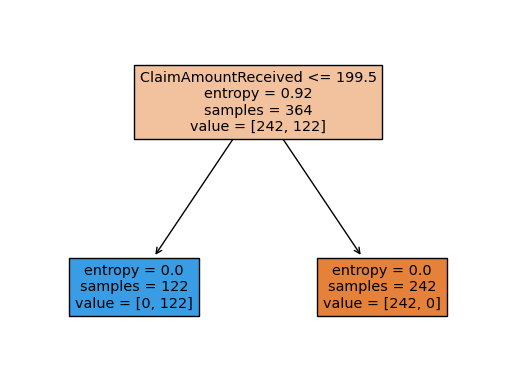

In [19]:
#affichage de l'arbre
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=list(nouv_df_train.columns[:-1]), filled=True)

## Validation avec un jeu de test

Validation du classeur clf avec le jeu de test.
Il faut s'assurer que le jeu de test est dans la même configuration
que le jeu d'entrainement.
Étant que nous avons transformé les variables qualitativesen en nombre,
Dans le jeu d'entrainement:
1.InjuryType = BrokenLimb,Soft Tissue,Back,Serious
2.OvernightHospitalStay=yes/no
Il faut faire la même chose dans le cas de jeu de test:


In [22]:
nouv_df_test=pd.get_dummies(data_test[data_test.columns[:-1]])

In [23]:
#il faut aussi renommer la variable cible
# et comme la variable cible est nommée Fraude, il faut aussi la renommer en class
nouv_df_test['class'] = data_test['Fraude']

In [24]:
#séparons les donnees de test des variables prédictives de celles 
#de la variable cible

X_test=nouv_df_test.iloc[:,:-1]
y_test=nouv_df_test['class']

In [25]:
#Voici un exemple de résultat de test avec le modele clf obtenu initialement 
# testé avec les données de test

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# le taux de détection est de l'ordre de :


0.9891304347826086

In [26]:
#ceci est un excellent début mais il faudrait mener des expérimentation avec 
#différents échantillons de données d'entrainement de tailles 
#substantielles pour en tirer des conclusion sur le modèle de prédiction
#des fraudes. De plus, il faut passer par l'étape de réglage des hyper-paramètres. en utilsant le GridSearch.